# Objective
> The primary objective of this case study is to develop, test, and optimize 2–3 day trading strategies focused on small to large-cap equities with a holding period of 1min – 7 hours. The aim is to capitalize on short-term market movements using quantitative and technical techniques. -  Stratagem Research

## Day Trading Strategies
#### ICT Methods (Inner Circle Trader):
> How it works: ICT methods focus on market manipulation by large institutions. They use concepts like market structure, order blocks, liquidity pools, and imbalance areas. Traders look for price action signals in these areas to enter and exit trades.

> Downsides: Requires deep understanding and experience. Not suitable for beginners due to complexity. Markets may not always behave as predicted by ICT concepts.

#### Gap Hunts:
> How it works: Traders exploit price gaps that occur when the market opens significantly higher or lower than the previous close. They anticipate that the gap will fill (the price will move back to the previous close level).

> Downsides: Not all gaps fill, and trying to trade every gap can lead to significant losses. Market conditions need to be right for gap trading to be effective.

#### Momentum/Trend Following:
> How it works: Traders follow the prevailing trend, buying in an uptrend and selling in a downtrend. They use indicators like Moving Averages, Relative Strength Index (RSI), and MACD to identify trends and confirm momentum.

> Downsides: Trends can reverse suddenly, leading to losses. Trend-following can also lead to late entries and exits, reducing profit margins. It can be challenging in sideways or choppy markets.

#### Pullbacks:
> How it works: Traders look for temporary price retracements within a larger trend. They enter trades in the direction of the trend after the price pulls back to a support or resistance level.

> Downsides: Determining the end of a pullback can be difficult. Pullbacks can turn into full trend reversals, leading to losses. Requires accurate timing and market analysis.

#### Mean Reversions:
> How it works: Traders assume that prices will revert to their historical average or mean. They buy when prices are below the mean and sell when prices are above the mean, using indicators like Bollinger Bands and moving averages (Can use different rolling and estimated moving averages over different time frames).

> Downsides: Prices may stay overbought or oversold for extended periods, leading to significant drawdowns. Mean reversion strategies can fail in trending markets where prices move far from the mean.

#### Breakouts:
> How it works: Traders enter positions when the price breaks through a significant support or resistance level with increased volume. They use indicators like Bollinger Bands, trendlines, and pivot points to identify breakouts.

> Downsides: False breakouts (fakeouts) are common, leading to losses. Requires quick decision-making and fast execution. High volatility can result in large price swings against the trader.

## Detailed Market Scenarios and the use of these 6 different trading strategies:
> #### High Volatility Market
>> The market experiences a sudden spike in volatility due to unexpected geopolitical tensions. Stock prices exhibit wide intraday swings, and the VIX (Volatility Index) spikes to its highest level in months.
>>> ICT Methods: How do order blocks and liquidity pools behave under extreme volatility?

>>> Gap Hunts: Evaluate the frequency and reliability of gap fills during high volatility.

>>> Momentum/Trend Following: Assess the ability to ride short-term trends amidst rapid price movements.

>>> Pullbacks: Test the identification and success rate of pullbacks during large price swings.

>>> Mean Reversions: Check the viability of mean reversion trades in a highly volatile environment.

>>> Breakouts: Monitor the success rate of breakouts and false breakouts.

> #### Market Announcement Day
>> The Federal Reserve is scheduled to announce its interest rate decision. Leading up to the announcement, the market is relatively calm, but significant price movements are expected once the announcement is made. A company is about to annouce its earnings or has a significant event lined up: eg: WWDC for AAPL
>>> ICT Methods: Monitor price action around key levels before and after the announcement.

>>> Gap Hunts: Identify potential gaps created by the announcement and their fill probabilities.

>>> Momentum/Trend Following: Track the emergence of new trends post-announcement.

>>> Pullbacks: Evaluate pullback opportunities created by the initial price reaction.

>>> Mean Reversions: Assess the potential for price reversion following the initial announcement shock.

>>> Breakouts: Identify breakout opportunities around the announcement time.

> #### Typical Trading Day
>> The market exhibits typical behavior with moderate volatility, influenced by regular economic data releases.
>>> ICT Methods: Observe how standard market structures and liquidity pools behave in normal conditions.

>>> Gap Hunts: Evaluate the occurrence and reliability of gaps on a regular trading day.

>>> Momentum/Trend Following: Test the ability to follow medium-term trends in a stable environment.

>>> Pullbacks: Identify and trade pullbacks in the context of ongoing trends.

>>> Mean Reversions: Monitor opportunities for mean reversion trades in a balanced market.

>>> Breakouts: Identify and trade breakouts from established support and resistance levels.

<div class="alert alert-block alert-info">
Code for Gap Hunts
</div>

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib import rcParams
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize'] = 8,6
rcParams['font.family'] = 'serif'
import seaborn as sb
pd.set_option('min_rows',800)
sb.set()

In [4]:
## ticker = yf.download('SPY','2010-1-1') # The ticker can be changed based on what stock you want to implement the strategy on
ticker_day = yf.download(['SPY'],period='1mo',interval='1d')
vix = yf.download(['^VIX'],period='1mo',interval='1d') # Important to note that this is expected annualized volatility for the next 30 days, to convert it into daily volatility I will divide it by sqrt 252 
ticker_day['VIX'] = vix['Close']/sqrt(252)
ticker_day

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-05  530.770020  534.690002  528.729980  534.669983  532.950623   
2024-06-06  534.979980  535.419983  532.679993  534.659973  532.940674   
2024-06-07  533.659973  536.890015  532.539978  534.010010  532.292786   
2024-06-10  533.179993  535.989990  532.570007  535.659973  533.937439   
2024-06-11  534.070007  537.010010  532.049988  536.950012  535.223328   
2024-06-12  541.630005  544.119995  540.299988  541.359985  539.619141   
2024-06-13  543.150024  543.330017  539.590027  542.450012  540.705627   
2024-06-14  540.880005  542.809998  539.849976  542.780029  541.034607   
2024-06-17  542.080017  548.530029  541.609985  547.099976  545.340637   
2024-06-18  547.159973  548.619995  546.729980  548.489990  546.726196   
2024-06-20  549.440002  550.119995  545.179993  547.000000  545.240967   
2024-06-21  544.400024  545.650024  543.020020  544.510010  544.510010   
2024-06-24  544.330017  546.950012  542.619995  542.739990  542.739990   
2024-06-25  543.989990  545.200012  542.440002  544.830017  544.830017   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   
2024-07-03  548.690002  551.830017  548.650024  551.460022  551.460022   
2024-07-05  551.770020  554.520020  551.119995  554.209900  554.209900   

              Volume       VIX  
Date                            
2024-06-05  47610400  0.795615  
2024-06-06  30808500  0.792466  
2024-06-07  43224500  0.769788  
2024-06-10  35729300  0.802545  
2024-06-11  36383400  0.809474  
2024-06-12  63251300  0.758449  
2024-06-13  44760900  0.752149  
2024-06-14  40089900  0.797505  
2024-06-17  55839500  0.803175  
2024-06-18  41376400  0.774827  
2024-06-20  70328200  0.836561  
2024-06-21  64513900  0.831522  
2024-06-24  45528700  0.839711  
2024-06-25  38273300  0.808844  
2024-06-26  38550600  0.790576  
2024-06-27  35041500  0.771048  
2024-06-28  76144500  0.783646  
2024-07-01  40297800  0.769788  
2024-07-02  40434800  0.757819  
2024-07-03  32789900  0.761598  
2024-07-05  19357031  0.789316

In [5]:
ticker_day['Gap'] = ticker_day['Open']-ticker_day['Close'].shift(1)
ticker_day

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-05  530.770020  534.690002  528.729980  534.669983  532.950623   
2024-06-06  534.979980  535.419983  532.679993  534.659973  532.940674   
2024-06-07  533.659973  536.890015  532.539978  534.010010  532.292786   
2024-06-10  533.179993  535.989990  532.570007  535.659973  533.937439   
2024-06-11  534.070007  537.010010  532.049988  536.950012  535.223328   
2024-06-12  541.630005  544.119995  540.299988  541.359985  539.619141   
2024-06-13  543.150024  543.330017  539.590027  542.450012  540.705627   
2024-06-14  540.880005  542.809998  539.849976  542.780029  541.034607   
2024-06-17  542.080017  548.530029  541.609985  547.099976  545.340637   
2024-06-18  547.159973  548.619995  546.729980  548.489990  546.726196   
2024-06-20  549.440002  550.119995  545.179993  547.000000  545.240967   
2024-06-21  544.400024  545.650024  543.020020  544.510010  544.510010   
2024-06-24  544.330017  546.950012  542.619995  542.739990  542.739990   
2024-06-25  543.989990  545.200012  542.440002  544.830017  544.830017   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   
2024-07-03  548.690002  551.830017  548.650024  551.460022  551.460022   
2024-07-05  551.770020  554.520020  551.119995  554.209900  554.209900   

              Volume       VIX       Gap  
Date                                      
2024-06-05  47610400  0.795615       NaN  
2024-06-06  30808500  0.792466  0.309998  
2024-06-07  43224500  0.769788 -1.000000  
2024-06-10  35729300  0.802545 -0.830017  
2024-06-11  36383400  0.809474 -1.589966  
2024-06-12  63251300  0.758449  4.679993  
2024-06-13  44760900  0.752149  1.790039  
2024-06-14  40089900  0.797505 -1.570007  
2024-06-17  55839500  0.803175 -0.700012  
2024-06-18  41376400  0.774827  0.059998  
2024-06-20  70328200  0.836561  0.950012  
2024-06-21  64513900  0.831522 -2.599976  
2024-06-24  45528700  0.839711 -0.179993  
2024-06-25  38273300  0.808844  1.250000  
2024-06-26  38550600  0.790576 -1.140015  
2024-06-27  35041500  0.771048 -0.140015  
2024-06-28  76144500  0.783646  0.789978  
2024-07-01  40297800  0.769788  1.410034  
2024-07-02  40434800  0.757819 -1.640015  
2024-07-03  32789900  0.761598 -0.320007  
2024-07-05  19357031  0.789316  0.309998

It is important to realise that everyday, markets open either up or down but to have a significant impact, the percentages should be large enough, therefore I would be describing the statistics of the Gap column to find further statistics. 

In [6]:
ticker_day['Gap'].describe()

count    20.000000
mean     -0.007999
std       1.596934
min      -2.599976
25%      -1.035004
50%      -0.160004
75%       0.829987
max       4.679993
Name: Gap, dtype: float64

The average change is +0.133163$ however, taking the standard deviation we see that approx 68% of our data lies within 0.133163 
+- 1.710912.

Approximately 95% of our data then lies within 0.133163 +- 3.421924

In [7]:
one_std = np.arange(ticker_day['Gap'].mean().round(4)-ticker_day['Gap'].std().round(4),ticker_day['Gap'].mean().round(4)+ticker_day['Gap'].std().round(4),0.0001)
two_std = np.arange(ticker_day['Gap'].mean().round(4)-2*ticker_day['Gap'].std().round(4),ticker_day['Gap'].mean().round(4)+2*ticker_day['Gap'].std().round(4),0.0001)

First, I will try to test the strategy with one_std and if that yields lower accuracy, we will try the two_std, just because the frequency of the former would be higher therefore more number of trades

In [8]:
ticker_day['Gap_Up'] = np.where(ticker_day['Gap']>one_std[-1],1,0)
ticker_day['Gap_Down'] = np.where(ticker_day['Gap']<one_std[0],1,0)
ticker_day['Gap_Up2'] = np.where(ticker_day['Gap']>two_std[-1],1,0)
ticker_day['Gap_Down2'] = np.where(ticker_day['Gap']<two_std[0],1,0)
ticker_day['Position'] = 0
ticker_day['PnL'] = 0
ticker_day
#ticker_day[ticker_day['Gap_Up']==1].index

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-05  530.770020  534.690002  528.729980  534.669983  532.950623   
2024-06-06  534.979980  535.419983  532.679993  534.659973  532.940674   
2024-06-07  533.659973  536.890015  532.539978  534.010010  532.292786   
2024-06-10  533.179993  535.989990  532.570007  535.659973  533.937439   
2024-06-11  534.070007  537.010010  532.049988  536.950012  535.223328   
2024-06-12  541.630005  544.119995  540.299988  541.359985  539.619141   
2024-06-13  543.150024  543.330017  539.590027  542.450012  540.705627   
2024-06-14  540.880005  542.809998  539.849976  542.780029  541.034607   
2024-06-17  542.080017  548.530029  541.609985  547.099976  545.340637   
2024-06-18  547.159973  548.619995  546.729980  548.489990  546.726196   
2024-06-20  549.440002  550.119995  545.179993  547.000000  545.240967   
2024-06-21  544.400024  545.650024  543.020020  544.510010  544.510010   
2024-06-24  544.330017  546.950012  542.619995  542.739990  542.739990   
2024-06-25  543.989990  545.200012  542.440002  544.830017  544.830017   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   
2024-07-03  548.690002  551.830017  548.650024  551.460022  551.460022   
2024-07-05  551.770020  554.520020  551.119995  554.209900  554.209900   

              Volume       VIX       Gap  Gap_Up  Gap_Down  Gap_Up2  \
Date                                                                  
2024-06-05  47610400  0.795615       NaN       0         0        0   
2024-06-06  30808500  0.792466  0.309998       0         0        0   
2024-06-07  43224500  0.769788 -1.000000       0         0        0   
2024-06-10  35729300  0.802545 -0.830017       0         0        0   
2024-06-11  36383400  0.809474 -1.589966       0         0        0   
2024-06-12  63251300  0.758449  4.679993       1         0        1   
2024-06-13  44760900  0.752149  1.790039       1         0        0   
2024-06-14  40089900  0.797505 -1.570007       0         0        0   
2024-06-17  55839500  0.803175 -0.700012       0         0        0   
2024-06-18  41376400  0.774827  0.059998       0         0        0   
2024-06-20  70328200  0.836561  0.950012       0         0        0   
2024-06-21  64513900  0.831522 -2.599976       0         1        0   
2024-06-24  45528700  0.839711 -0.179993       0         0        0   
2024-06-25  38273300  0.808844  1.250000       0         0        0   
2024-06-26  38550600  0.790576 -1.140015       0         0        0   
2024-06-27  35041500  0.771048 -0.140015       0         0        0   
2024-06-28  76144500  0.783646  0.789978       0         0        0   
2024-07-01  40297800  0.769788  1.410034       0         0        0   
2024-07-02  40434800  0.757819 -1.640015       0         1        0   
2024-07-03  32789900  0.761598 -0.320007       0         0        0   
2024-07-05  19357031  0.789316  0.309998       0         0        0   

            Gap_Down2  Position  PnL  
Date                                  
2024-06-05          0         0    0  
2024-06-06          0         0    0  
2024-06-07          0         0    0  
2024-06-10          0         0    0  
2024-06-11          0         0    0  
2024-06-12          0         0    0  
2024-06-13          0         0    0  
2024-06-14          0         0    0  
2024-06-17          0         0    0  
2024-06-18          0         0    0  
2024-06-20          0         0    0  
2024-06-21          0         0    0  
2024-06-24          0         0    0  
2024-06-25          0         0    0  
2024-06-26          0         0    0  
2024-06-27        

In [9]:
for i in range(0,len(ticker_day)):
    if ticker_day['Gap_Up'].iloc[i] ==1:
        if ticker_day['Gap_Up2'].iloc[i] ==1:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -2
        else:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -1
        Date = ticker_day[ticker_day['Open']==entry_price].index
        for j in Date:
            ticker = pd.DataFrame()
            ticker = yf.download('SPY',j,j+timedelta(days=0,hours=23),interval='5m')
            print(ticker)
            for k in range(0,len(ticker)):
                if ticker['Close'].iloc[k]>(100+ticker_day['VIX'].iloc[i]/2)*entry_price: # Trigger Stoploss if it moves above half of its expected volatility
                    exit_price = ticker['Close'].iloc[k]
                if ticker['Close'].iloc[k]<(100-ticker_day['VIX'].iloc[i]/2)*entry_price: # Target if it moves below half of its expected movement
                    exit_price = ticker['Close'].iloc[k]
                else:
                    exit_price = ticker_day['Close'].iloc[i]
        if ticker_day['Position'].iloc[i]==-2:
            ticker_day['PnL'].iloc[i] = 2*(entry_price - exit_price)
        else:
            ticker_day['PnL'].iloc[i] = entry_price - exit_price
    elif ticker_day['Gap_Down'].iloc[i] ==1:
        if ticker_day['Gap_Down2'].iloc[i] ==1:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = 2
        else:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -1
        Date = ticker_day[ticker_day['Open']==entry_price].index
        for j in Date:
            print(j)
            ticker = pd.DataFrame()
            ticker = yf.download('SPY',j,j+timedelta(days=0,hours=23),interval='5m')
            for k in range(0,len(ticker)):
                if ticker['Close'].iloc[k]>(100+ticker_day['VIX'].iloc[i]/2)*entry_price: # Target if it moves below half of its expected movement
                    exit_price = ticker['Close'].iloc[k]
                if ticker['Close'].iloc[k]<(100-ticker_day['VIX'].iloc[i]/2)*entry_price: # Trigger Stoploss if it moves above half of its expected volatility
                    exit_price = ticker['Close'].iloc[k]
                else:
                    exit_price = ticker_day['Close'].iloc[i]
        if ticker_day['Position'].iloc[i]==-2:
            ticker_day['PnL'].iloc[i] = 2*(exit_price - entry_price)
        else:
            ticker_day['PnL'].iloc[i] = exit_price-entry_price
count = 0
for i in range(0,len(ticker_day)):
    if ticker_day['Position'].iloc[i] == 0:
        continue
    else:
        count +=1
ticker_day['Cumulative_PnL'] = ticker_day['PnL'].cumsum()
ticker_day


/tmp/ipykernel_36935/1518822262.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['Position'].iloc[i] = -2
/tmp/ipykernel_36935/1518822262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-06-12 09:30:00-04:00  541.359985  541.710022  541.244995  541.330017   
2024-06-12 09:35:00-04:00  541.359985  541.830017  541.270020  541.770020   
2024-06-12 09:40:00-04:00  541.775024  542.679993  541.669983  542.670105   
2024-06-12 09:45:00-04:00  542.659973  542.880005  542.494995  542.849976   
2024-06-12 09:50:00-04:00  542.859985  542.900024  542.349976  542.359985   
2024-06-12 09:55:00-04:00  542.359985  542.960022  542.353210  542.688721   
2024-06-12 10:00:00-04:00  542.679993  542.969971  542.539978  542.900024   
2024-06-12 10:05:00-04:00  542.909973  542.989990  542.585022  542.690002   
2024-06-12 10:10:00-04:00  542.690002  543.175110  542.580017  543.130005   
2024-06-12 10:15:00-04:00  543.130005  543.479980  543.130005  543.359985   
2024-06-12 10:20:00-04:00  543.359985  543.560608  543.242920  543.510010   

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_36935/1518822262.py:47: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['PnL'].iloc[i] = exit_price-entry_price
/tmp/ipykernel_36935/1518822262.py:3

2024-07-02 00:00:00



/tmp/ipykernel_36935/1518822262.py:47: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['PnL'].iloc[i] = exit_price-entry_price


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-06-05  530.770020  534.690002  528.729980  534.669983  532.950623   
2024-06-06  534.979980  535.419983  532.679993  534.659973  532.940674   
2024-06-07  533.659973  536.890015  532.539978  534.010010  532.292786   
2024-06-10  533.179993  535.989990  532.570007  535.659973  533.937439   
2024-06-11  534.070007  537.010010  532.049988  536.950012  535.223328   
2024-06-12  541.630005  544.119995  540.299988  541.359985  539.619141   
2024-06-13  543.150024  543.330017  539.590027  542.450012  540.705627   
2024-06-14  540.880005  542.809998  539.849976  542.780029  541.034607   
2024-06-17  542.080017  548.530029  541.609985  547.099976  545.340637   
2024-06-18  547.159973  548.619995  546.729980  548.489990  546.726196   
2024-06-20  549.440002  550.119995  545.179993  547.000000  545.240967   
2024-06-21  544.400024  545.650024  543.020020  544.510010  544.510010   
2024-06-24  544.330017  546.950012  542.619995  542.739990  542.739990   
2024-06-25  543.989990  545.200012  542.440002  544.830017  544.830017   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   
2024-07-03  548.690002  551.830017  548.650024  551.460022  551.460022   
2024-07-05  551.770020  554.520020  551.119995  554.209900  554.209900   

              Volume       VIX       Gap  Gap_Up  Gap_Down  Gap_Up2  \
Date                                                                  
2024-06-05  47610400  0.795615       NaN       0         0        0   
2024-06-06  30808500  0.792466  0.309998       0         0        0   
2024-06-07  43224500  0.769788 -1.000000       0         0        0   
2024-06-10  35729300  0.802545 -0.830017       0         0        0   
2024-06-11  36383400  0.809474 -1.589966       0         0        0   
2024-06-12  63251300  0.758449  4.679993       1         0        1   
2024-06-13  44760900  0.752149  1.790039       1         0        0   
2024-06-14  40089900  0.797505 -1.570007       0         0        0   
2024-06-17  55839500  0.803175 -0.700012       0         0        0   
2024-06-18  41376400  0.774827  0.059998       0         0        0   
2024-06-20  70328200  0.836561  0.950012       0         0        0   
2024-06-21  64513900  0.831522 -2.599976       0         1        0   
2024-06-24  45528700  0.839711 -0.179993       0         0        0   
2024-06-25  38273300  0.808844  1.250000       0         0        0   
2024-06-26  38550600  0.790576 -1.140015       0         0        0   
2024-06-27  35041500  0.771048 -0.140015       0         0        0   
2024-06-28  76144500  0.783646  0.789978       0         0        0   
2024-07-01  40297800  0.769788  1.410034       0         0        0   
2024-07-02  40434800  0.757819 -1.640015       0         1        0   
2024-07-03  32789900  0.761598 -0.320007       0         0        0   
2024-07-05  19357031  0.789316  0.309998       0         0        0   

            Gap_Down2  Position       PnL  Cumulative_PnL  
Date                                                       
2024-06-05          0         0  0.000000        0.000000  
2024-06-06          0         0  0.000000        0.000000  
2024-06-07          0         0  0.000000        0.000000  
2024-06-10          0         0  0.000000        0.000000  
2024-06-11          0         0  0.000000        0.000000  
2024-06-12          0        -2  0.589966        0.589966  
2024-06-13          0        -1  0.740051        1.330017  
2024-06-14          0         0  0.000000        1.330017  
2024-06-17          0         0  0.000000        1.330017  
2024-06-18          0

In [11]:
# Example: 10-year US Treasury yield (annualized)
risk_free_rate = 0.01 / 252  # assuming daily returns
average_return = ticker_day['Cumulative_PnL'][-1]/len(ticker_day)
excess_return = average_return - risk_free_rate
std_dev_return = (ticker_day['Cumulative_PnL']/len(ticker_day)).std()

sharpe_ratio = excess_return / std_dev_return
sharpe_ratio

/tmp/ipykernel_36935/2812927948.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_return = ticker_day['Cumulative_PnL'][-1]/len(ticker_day)


3.100441150272222

<div class="alert alert-block alert-info">
Code for Moving Averages
</div>

In [12]:
# We need a fresh Dataframe for SPY
SPY = yf.download(['SPY'],'2020-1-1')
del SPY['Volume']
del SPY['High']
del SPY['Low']
del SPY['Adj Close']

[*********************100%%**********************]  1 of 1 completed


<div class="alert alert-block alert-warning">
The ADF statistic of -0.5183711016561788 is not more negative than any of the critical values.
The p-value of 0.8883813673892926 is much higher than the typical significance level of 0.05.
Based on these results, you fail to reject the null hypothesis that the time series has a unit root. This implies that the time series is non-stationary, meaning its statistical properties such as mean, variance, and autocorrelation are not constant over time.
</div>

Therefore initially without doing this test, I got a Cumulative PnL of $8.21, i would try to make the series stationary and then see if it has any impact on the total PnL

In [13]:
SPY['Close_Diff'] = SPY['Close'].diff()
result_diff = adfuller(SPY['Close_Diff'].dropna())
print('ADF Statistic:',result_diff[0])
print('p-value:',result_diff[1])
print("Critical Values:",result_diff[4])

ADF Statistic: -10.210097671955259
p-value: 5.667953729804173e-18
Critical Values: {'1%': -3.4361812251221555, '5%': -2.864114820815637, '10%': -2.5681409066817795}


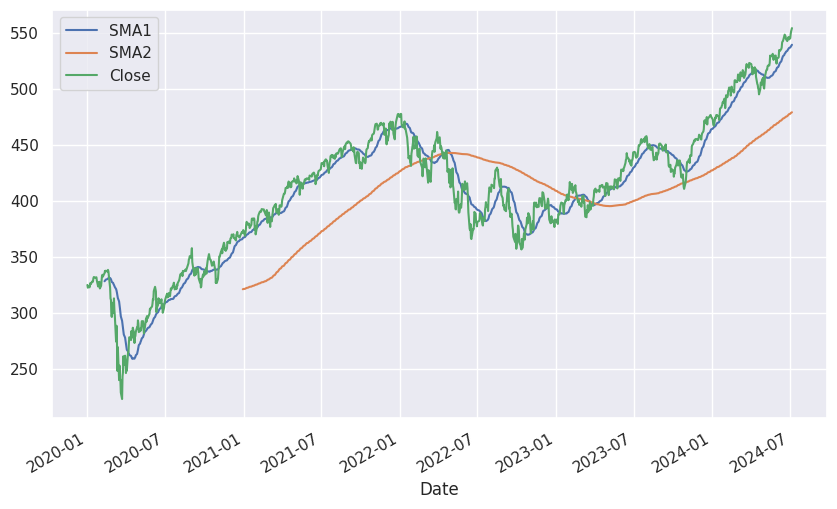

In [14]:
SMA1 = 28
SMA2 = 252
SPY['SMA1'] = SPY['Close'].rolling(SMA1).mean()
SPY['SMA2'] = SPY['Close'].rolling(SMA2).mean()
SPY[['SMA1','SMA2','Close']].plot(figsize=(10,6));

To trade: 
> Go long when the 28 SMA is bove the 252 SMA

> Go short when vice versa

However this is not an intraday strategy rather, this is for long term holding and long term shorting
>> Therefore to implement the Pullback strategy I need to find a way to quantify the long term moving average

In [15]:
SPY.dropna()

Open       Close  Close_Diff        SMA1        SMA2
Date                                                                  
2020-12-30  372.339996  371.989990    0.529999  366.564285  321.007501
2020-12-31  371.779999  373.880005    1.890015  367.139285  321.201985
2021-01-04  375.309998  368.790009   -5.089996  367.620001  321.386033
2021-01-05  368.100006  371.329987    2.539978  368.115358  321.575279
2021-01-06  369.709991  373.549988    2.220001  368.484286  321.776945
2021-01-07  376.100006  379.100006    5.550018  369.071429  321.993810
2021-01-08  380.589996  381.260010    2.160004  369.699643  322.210517
2021-01-11  377.850006  378.690002   -2.570007  370.293571  322.420755
2021-01-12  378.890015  378.769989    0.079987  370.748929  322.622421
2021-01-13  378.690002  379.790009    1.020020  371.213214  322.830120
2021-01-14  380.589996  378.459991   -1.330017  371.633571  323.029604
2021-01-15  376.720001  375.700012   -2.759979  371.842500  323.207302
2021-01-19  378.339996  378.649994    2.949982  372.183928  323.392620
2021-01-20  381.109985  383.890015    5.240021  372.673928  323.601310
2021-01-21  384.489990  384.239990    0.349976  373.294999  323.811231
2021-01-22  382.250000  382.880005   -1.359985  373.871785  324.014247
2021-01-25  383.670013  384.390015    1.510010  374.517857  324.234961
2021-01-26  385.410004  383.790009   -0.600006  375.201072  324.474207
2021-01-27  380.220001  374.410004   -9.380005  375.373215  324.662779
2021-01-28  376.359985  377.630005    3.220001  375.639643  324.865199
2021-01-29  375.630005  370.070007   -7.559998  375.562144  325.033414
2021-02-01  373.720001  376.230011    6.160004  375.813930  325.249683
2021-02-02  379.649994  381.549988    5.319977  376.302859  325.477580
2021-02-03  382.440002  381.850006    0.300018  376.824645  325.687064
2021-02-04  382.959991  386.190002    4.339996  377.489645  325.898691
2021-02-05  388.200012  387.709991    1.519989  378.157859  326.111906
2021-02-08  389.269989  390.510010    2.800018  378.812859  326.343295
2021-02-09  389.609985  390.250000   -0.260010  379.483930  326.563810
2021-02-10  392.119995  390.079987   -0.170013  380.130002  326.781350
2021-02-11  391.239990  390.709991    0.630005  380.731073  326.992818
...                ...         ...         ...         ...         ...
2024-05-22  530.650024  529.830017   -1.529968  513.205002  466.673691
2024-05-23  532.960022  525.960022   -3.869995  513.973216  467.117620
2024-05-24  527.849976  529.440002    3.479980  514.898574  467.587263
2024-05-28  530.270020  529.809998    0.369995  515.943574  468.044247
2024-05-29  525.679993  526.099976   -3.710022  516.892859  468.465199
2024-05-30  524.520020  522.609985   -3.489990  517.873216  468.871667
2024-05-31  523.590027  527.369995    4.760010  518.860716  469.306271
2024-06-03  529.020020  527.799988    0.429993  519.651787  469.726826
2024-06-04  526.460022  528.390015    0.590027  520.472501  470.125516
2024-06-05  530.770020  534.669983    6.279968  521.586073  470.552381
2024-06-06  534.979980  534.659973   -0.010010  522.528928  470.975516
2024-06-07  533.659973  534.010010   -0.649963  523.384286  471.401945
2024-06-10  533.179993  535.659973    1.649963  524.587142  471.824683
2024-06-11  534.070007  536.950012    1.290039  525.894285  472.249485
2024-06-12  541.630005  541.359985    4.409973  527.191784  472.676310
2024-06-13  543.150024  542.450012    1.090027  528.304642  473.096112
2024-06-14  540.880005  542.780029    0.330017  529.240714  473.515159
2024-06-17  542.080017  547.099976    4.319946  530.310713  473.929842
2024-06-18  547.159973  548.489990    1.390015  531.428569  474.362501
2024-06-20  549.440002  547.000000   -1.489990  532.386784  474.798294
2024-06-21  544.400024  544.510010   -2.489990  533.232141  475.233096
2024-06-24  544.330017  542.739990   -1.770020  534.011784  475.654643
2024-06-25  543.989990  544.830017    2.090027  534.780714  476.097580
2024-06-26  543.690002  545.510010    0.67

In [16]:
SPY_SMA2_Pct_change = SPY['SMA2'].pct_change()*100
SPY["SMA2 % Change"] = SPY_SMA2_Pct_change
SPY_Close_Pct_change = SPY['Close'].pct_change()*100
SPY["Close % Change"] = SPY_Close_Pct_change
SPY['Position'] = 0
SPY['PnL'] = 0
SPY['Cumulative PnL'] = SPY['PnL'].cumsum()
SPY.dropna()

Open       Close  Close_Diff        SMA1        SMA2  \
Date                                                                     
2020-12-31  371.779999  373.880005    1.890015  367.139285  321.201985   
2021-01-04  375.309998  368.790009   -5.089996  367.620001  321.386033   
2021-01-05  368.100006  371.329987    2.539978  368.115358  321.575279   
2021-01-06  369.709991  373.549988    2.220001  368.484286  321.776945   
2021-01-07  376.100006  379.100006    5.550018  369.071429  321.993810   
2021-01-08  380.589996  381.260010    2.160004  369.699643  322.210517   
2021-01-11  377.850006  378.690002   -2.570007  370.293571  322.420755   
2021-01-12  378.890015  378.769989    0.079987  370.748929  322.622421   
2021-01-13  378.690002  379.790009    1.020020  371.213214  322.830120   
2021-01-14  380.589996  378.459991   -1.330017  371.633571  323.029604   
2021-01-15  376.720001  375.700012   -2.759979  371.842500  323.207302   
2021-01-19  378.339996  378.649994    2.949982  372.183928  323.392620   
2021-01-20  381.109985  383.890015    5.240021  372.673928  323.601310   
2021-01-21  384.489990  384.239990    0.349976  373.294999  323.811231   
2021-01-22  382.250000  382.880005   -1.359985  373.871785  324.014247   
2021-01-25  383.670013  384.390015    1.510010  374.517857  324.234961   
2021-01-26  385.410004  383.790009   -0.600006  375.201072  324.474207   
2021-01-27  380.220001  374.410004   -9.380005  375.373215  324.662779   
2021-01-28  376.359985  377.630005    3.220001  375.639643  324.865199   
2021-01-29  375.630005  370.070007   -7.559998  375.562144  325.033414   
2021-02-01  373.720001  376.230011    6.160004  375.813930  325.249683   
2021-02-02  379.649994  381.549988    5.319977  376.302859  325.477580   
2021-02-03  382.440002  381.850006    0.300018  376.824645  325.687064   
2021-02-04  382.959991  386.190002    4.339996  377.489645  325.898691   
2021-02-05  388.200012  387.709991    1.519989  378.157859  326.111906   
2021-02-08  389.269989  390.510010    2.800018  378.812859  326.343295   
2021-02-09  389.609985  390.250000   -0.260010  379.483930  326.563810   
2021-02-10  392.119995  390.079987   -0.170013  380.130002  326.781350   
2021-02-11  391.239990  390.709991    0.630005  380.731073  326.992818   
2021-02-12  389.850006  392.640015    1.930023  381.582858  327.213374   
...                ...         ...         ...         ...         ...   
2024-05-22  530.650024  529.830017   -1.529968  513.205002  466.673691   
2024-05-23  532.960022  525.960022   -3.869995  513.973216  467.117620   
2024-05-24  527.849976  529.440002    3.479980  514.898574  467.587263   
2024-05-28  530.270020  529.809998    0.369995  515.943574  468.044247   
2024-05-29  525.679993  526.099976   -3.710022  516.892859  468.465199   
2024-05-30  524.520020  522.609985   -3.489990  517.873216  468.871667   
2024-05-31  523.590027  527.369995    4.760010  518.860716  469.306271   
2024-06-03  529.020020  527.799988    0.429993  519.651787  469.726826   
2024-06-04  526.460022  528.390015    0.590027  520.472501  470.125516   
2024-06-05  530.770020  534.669983    6.279968  521.586073  470.552381   
2024-06-06  534.979980  534.659973   -0.010010  522.528928  470.975516   
2024-06-07  533.659973  534.010010   -0.649963  523.384286  471.401945   
2024-06-10  533.179993  535.659973    1.649963  524.587142  471.824683   
2024-06-11  534.070007  536.950012    1.290039  525.894285  472.249485   
2024-06-12  541.630005  541.359985    4.409973  527.191784  472.676310   
2024-06-13  543.150024  542.450012    1.090027  528.304642  473.096112   
2024-06-14  540.880005  542.780029    0.330017  529.240714  473.515159   
2024-06-17  542.080017  547.099976    4.319946  530.310713  473.929842   
2024-06-18  547.159973  548.489990    1.390015  531.428569  474.362501   
2024-06-20  549.440002  547.000000   -1.489990  532.386784  474.798294   
2024-06-21  544.400024  544.510010   -2.489990  533.232141  475.233096   
2024-06-24  544.330017

However, from experience, after a long term trend, if a stock fells during a day there might be a gap up opening the next day and taking a long position then goes against the Gap Hunt strategy therefore i would be implementing some part of the Gap Hunt strategy to the SMA Strategy too

In [17]:
SPY['Gap'] = SPY['Open']-SPY['Close'].shift(1)
one_std = np.arange(SPY['Gap'].mean().round(4)-SPY['Gap'].std().round(4),SPY['Gap'].mean().round(4)+SPY['Gap'].std().round(4),0.0001)
SPY['Gap_Up'] = np.where(SPY['Gap']>one_std[-1],1,0)
SPY['Gap_Down'] = np.where(SPY['Gap']<one_std[0],1,0)
SPY

Open       Close  Close_Diff        SMA1        SMA2  \
Date                                                                     
2020-01-02  323.540009  324.869995         NaN         NaN         NaN   
2020-01-03  321.160004  322.410004   -2.459991         NaN         NaN   
2020-01-06  320.489990  323.640015    1.230011         NaN         NaN   
2020-01-07  323.019989  322.730011   -0.910004         NaN         NaN   
2020-01-08  322.940002  324.450012    1.720001         NaN         NaN   
2020-01-09  326.160004  326.649994    2.199982         NaN         NaN   
2020-01-10  327.290009  325.709991   -0.940002         NaN         NaN   
2020-01-13  326.390015  327.950012    2.240021         NaN         NaN   
2020-01-14  327.470001  327.450012   -0.500000         NaN         NaN   
2020-01-15  327.350006  328.190002    0.739990         NaN         NaN   
2020-01-16  329.700012  330.920013    2.730011         NaN         NaN   
2020-01-17  331.700012  331.950012    1.029999         NaN         NaN   
2020-01-21  330.899994  331.299988   -0.650024         NaN         NaN   
2020-01-22  332.239990  331.339996    0.040009         NaN         NaN   
2020-01-23  330.630005  331.720001    0.380005         NaN         NaN   
2020-01-24  332.440002  328.769989   -2.950012         NaN         NaN   
2020-01-27  323.029999  323.500000   -5.269989         NaN         NaN   
2020-01-28  325.059998  326.890015    3.390015         NaN         NaN   
2020-01-29  328.380005  326.619995   -0.270020         NaN         NaN   
2020-01-30  324.359985  327.679993    1.059998         NaN         NaN   
2020-01-31  327.000000  321.730011   -5.949982         NaN         NaN   
2020-02-03  323.350006  324.119995    2.389984         NaN         NaN   
2020-02-04  328.070007  329.059998    4.940002         NaN         NaN   
2020-02-05  332.269989  332.859985    3.799988         NaN         NaN   
2020-02-06  333.910004  333.980011    1.120026         NaN         NaN   
2020-02-07  332.820007  332.200012   -1.779999         NaN         NaN   
2020-02-10  331.230011  334.679993    2.479980         NaN         NaN   
2020-02-11  336.160004  335.260010    0.580017  328.165359         NaN   
2020-02-12  336.829987  337.420013    2.160004  328.613574         NaN   
2020-02-13  335.859985  337.059998   -0.360016  329.136789         NaN   
...                ...         ...         ...         ...         ...   
2024-05-22  530.650024  529.830017   -1.529968  513.205002  466.673691   
2024-05-23  532.960022  525.960022   -3.869995  513.973216  467.117620   
2024-05-24  527.849976  529.440002    3.479980  514.898574  467.587263   
2024-05-28  530.270020  529.809998    0.369995  515.943574  468.044247   
2024-05-29  525.679993  526.099976   -3.710022  516.892859  468.465199   
2024-05-30  524.520020  522.609985   -3.489990  517.873216  468.871667   
2024-05-31  523.590027  527.369995    4.760010  518.860716  469.306271   
2024-06-03  529.020020  527.799988    0.429993  519.651787  469.726826   
2024-06-04  526.460022  528.390015    0.590027  520.472501  470.125516   
2024-06-05  530.770020  534.669983    6.279968  521.586073  470.552381   
2024-06-06  534.979980  534.659973   -0.010010  522.528928  470.975516   
2024-06-07  533.659973  534.010010   -0.649963  523.384286  471.401945   
2024-06-10  533.179993  535.659973    1.649963  524.587142  471.824683   
2024-06-11  534.070007  536.950012    1.290039  525.894285  472.249485   
2024-06-12  541.630005  541.359985    4.409973  527.191784  472.676310   
2024-06-13  543.150024  542.450012    1.090027  528.304642  473.096112   
2024-06-14  540.880005  542.780029    0.330017  529.240714  473.515159   
2024-06-17  542.080017  547.099976    4.319946  530.310713  473.929842   
2024-06-18  547.159973  548.489990    1.390015  531.428569  474.362501   
2024-06-20  549.440002  547.000000   -1.489990  532.386784  474.798294   
2024-06-21  544.400024  544.510010   -2.489990  533.232141  475.233096   
2024-06-24  544.330017

In [18]:
SPY = SPY.dropna()
for i in range(1,len(SPY)):
    if SPY['SMA2 % Change'].iloc[i-1] > 0 and SPY['Close % Change'].iloc[i-1]<-0.3 and SPY['Gap_Up'].iloc[i] < 1:
        entry_price = SPY['Open'].iloc[i]
        exit_price = SPY['Close'].iloc[i]
        SPY['Position'].iloc[i] = 1
        SPY['PnL'].iloc[i] = exit_price-entry_price
    elif SPY['SMA2 % Change'].iloc[i-1] < 0 and SPY['Close % Change'].iloc[i-1]>0 and SPY['Gap_Down'].iloc[i] <1:
        entry_price = SPY['Open'].iloc[i]
        exit_price = SPY['Close'].iloc[i]
        SPY['Position'].iloc[i] = -1
        SPY['PnL'].iloc[i] = -exit_price+entry_price
    else:
        SPY['Position'].iloc[i] = 0
        SPY['PnL'].iloc[i] = 0
SPY['Cumulative PnL'] = SPY['PnL'].cumsum()
SPY

/tmp/ipykernel_36935/1473339666.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  SPY['Position'].iloc[i] = 0
/tmp/ipykernel_36935/1473339666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Open       Close  Close_Diff        SMA1        SMA2  \
Date                                                                     
2020-12-31  371.779999  373.880005    1.890015  367.139285  321.201985   
2021-01-04  375.309998  368.790009   -5.089996  367.620001  321.386033   
2021-01-05  368.100006  371.329987    2.539978  368.115358  321.575279   
2021-01-06  369.709991  373.549988    2.220001  368.484286  321.776945   
2021-01-07  376.100006  379.100006    5.550018  369.071429  321.993810   
2021-01-08  380.589996  381.260010    2.160004  369.699643  322.210517   
2021-01-11  377.850006  378.690002   -2.570007  370.293571  322.420755   
2021-01-12  378.890015  378.769989    0.079987  370.748929  322.622421   
2021-01-13  378.690002  379.790009    1.020020  371.213214  322.830120   
2021-01-14  380.589996  378.459991   -1.330017  371.633571  323.029604   
2021-01-15  376.720001  375.700012   -2.759979  371.842500  323.207302   
2021-01-19  378.339996  378.649994    2.949982  372.183928  323.392620   
2021-01-20  381.109985  383.890015    5.240021  372.673928  323.601310   
2021-01-21  384.489990  384.239990    0.349976  373.294999  323.811231   
2021-01-22  382.250000  382.880005   -1.359985  373.871785  324.014247   
2021-01-25  383.670013  384.390015    1.510010  374.517857  324.234961   
2021-01-26  385.410004  383.790009   -0.600006  375.201072  324.474207   
2021-01-27  380.220001  374.410004   -9.380005  375.373215  324.662779   
2021-01-28  376.359985  377.630005    3.220001  375.639643  324.865199   
2021-01-29  375.630005  370.070007   -7.559998  375.562144  325.033414   
2021-02-01  373.720001  376.230011    6.160004  375.813930  325.249683   
2021-02-02  379.649994  381.549988    5.319977  376.302859  325.477580   
2021-02-03  382.440002  381.850006    0.300018  376.824645  325.687064   
2021-02-04  382.959991  386.190002    4.339996  377.489645  325.898691   
2021-02-05  388.200012  387.709991    1.519989  378.157859  326.111906   
2021-02-08  389.269989  390.510010    2.800018  378.812859  326.343295   
2021-02-09  389.609985  390.250000   -0.260010  379.483930  326.563810   
2021-02-10  392.119995  390.079987   -0.170013  380.130002  326.781350   
2021-02-11  391.239990  390.709991    0.630005  380.731073  326.992818   
2021-02-12  389.850006  392.640015    1.930023  381.582858  327.213374   
...                ...         ...         ...         ...         ...   
2024-05-22  530.650024  529.830017   -1.529968  513.205002  466.673691   
2024-05-23  532.960022  525.960022   -3.869995  513.973216  467.117620   
2024-05-24  527.849976  529.440002    3.479980  514.898574  467.587263   
2024-05-28  530.270020  529.809998    0.369995  515.943574  468.044247   
2024-05-29  525.679993  526.099976   -3.710022  516.892859  468.465199   
2024-05-30  524.520020  522.609985   -3.489990  517.873216  468.871667   
2024-05-31  523.590027  527.369995    4.760010  518.860716  469.306271   
2024-06-03  529.020020  527.799988    0.429993  519.651787  469.726826   
2024-06-04  526.460022  528.390015    0.590027  520.472501  470.125516   
2024-06-05  530.770020  534.669983    6.279968  521.586073  470.552381   
2024-06-06  534.979980  534.659973   -0.010010  522.528928  470.975516   
2024-06-07  533.659973  534.010010   -0.649963  523.384286  471.401945   
2024-06-10  533.179993  535.659973    1.649963  524.587142  471.824683   
2024-06-11  534.070007  536.950012    1.290039  525.894285  472.249485   
2024-06-12  541.630005  541.359985    4.409973  527.191784  472.676310   
2024-06-13  543.150024  542.450012    1.090027  528.304642  473.096112   
2024-06-14  540.880005  542.780029    0.330017  529.240714  473.515159   
2024-06-17  542.080017  547.099976    4.319946  530.310713  473.929842   
2024-06-18  547.159973  548.489990    1.390015  531.428569  474.362501   
2024-06-20  549.440002  547.000000   -1.489990  532.386784  474.798294   
2024-06-21  544.400024  544.510010   -2.489990  533.232141  475.233096   
2024-06-24  544.330017

In [20]:
# Example: 10-year US Treasury yield (annualized)
risk_free_rate = 0.01 / 252  # assuming daily returns
average_return = SPY['Cumulative PnL'][-1]/len(SPY)
excess_return = average_return - risk_free_rate
std_dev_return = (SPY['Cumulative PnL']/len(SPY)).std()

sharpe_ratio = excess_return / std_dev_return
sharpe_ratio

/tmp/ipykernel_36935/3224945747.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_return = SPY['Cumulative PnL'][-1]/len(SPY)


1.0303686109514958

<div class="alert alert-block alert-info">
Code Employing Long Short Term Memory to Predict the Price Movement the following day
</div>

In [40]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [41]:
data_spy = yf.download('SPY','2010-1-1')
data_spy

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002   86.580757   
2010-01-05  113.260002  113.680000  112.849998  113.629997   86.809952   
2010-01-06  113.519997  113.989998  113.430000  113.709999   86.871048   
2010-01-07  113.500000  114.330002  113.180000  114.190002   87.237755   
2010-01-08  113.889999  114.620003  113.660004  114.570000   87.528069   
2010-01-11  115.080002  115.129997  114.239998  114.730003   87.650337   
2010-01-12  113.970001  114.209999  113.220001  113.660004   86.832832   
2010-01-13  113.949997  114.940002  113.370003  114.620003   87.566269   
2010-01-14  114.489998  115.139999  114.419998  114.930000   87.803085   
2010-01-15  114.730003  114.839996  113.199997  113.639999   86.817589   
2010-01-19  113.620003  115.129997  113.589996  115.059998   87.902451   
2010-01-20  114.279999  114.449997  112.980003  113.889999   87.008568   
2010-01-21  113.919998  114.269997  111.559998  111.699997   85.335480   
2010-01-22  111.199997  111.739998  109.089996  109.209999   83.433189   
2010-01-25  110.209999  110.410004  109.410004  109.769997   83.861000   
2010-01-26  109.339996  110.470001  109.040001  109.309998   83.509560   
2010-01-27  109.169998  110.080002  108.330002  109.830002   83.906830   
2010-01-28  110.190002  110.250000  107.910004  108.570000   82.944244   
2010-01-29  109.040001  109.800003  107.220001  107.389999   82.042755   
2010-02-01  108.150002  109.070000  107.500000  109.059998   83.318588   
2010-02-02  109.260002  110.589996  108.879997  110.379997   84.327019   
2010-02-03  109.879997  110.480003  109.510002  109.830002   83.906830   
2010-02-04  108.980003  109.029999  106.419998  106.440002   81.316986   
2010-02-05  106.559998  106.879997  104.580002  106.660004   81.485069   
2010-02-08  106.739998  107.330002  105.809998  105.889999   80.896805   
2010-02-09  107.129997  108.150002  106.269997  107.220001   81.912895   
2010-02-10  107.050003  107.599998  106.110001  107.010002   81.752449   
2010-02-11  106.870003  108.250000  106.250000  108.129997   82.608116   
2010-02-12  106.989998  108.099998  106.510002  108.040001   82.539337   
2010-02-16  108.860001  109.849998  107.820000  109.739998   83.838066   
...                ...         ...         ...         ...         ...   
2024-05-22  530.650024  531.380005  527.599976  529.830017  528.126221   
2024-05-23  532.960022  533.070007  524.719971  525.960022  524.268677   
2024-05-24  527.849976  530.270020  526.880005  529.440002  527.737488   
2024-05-28  530.270020  530.510010  527.109985  529.809998  528.106262   
2024-05-29  525.679993  527.309998  525.369995  526.099976  524.408203   
2024-05-30  524.520020  525.200012  521.330017  522.609985  520.929382   
2024-05-31  523.590027  527.500000  518.359985  527.369995  525.674133   
2024-06-03  529.020020  529.309998  522.599976  527.799988  526.102722   
2024-06-04  526.460022  529.150024  524.960022  528.390015  526.690857   
2024-06-05  530.770020  534.690002  528.729980  534.669983  532.950623   
2024-06-06  534.979980  535.419983  532.679993  534.659973  532.940674   
2024-06-07  533.659973  536.890015  532.539978  534.010010  532.292786   
2024-06-10  533.179993  535.989990  532.570007  535.659973  533.937439   
2024-06-11  534.070007  537.010010  532.049988  536.950012  535.223328   
2024-06-12  541.630005  544.119995  540.299988  541.359985  539.619141   
2024-06-13  543.150024  543.330017  539.590027  542.450012  540.705627   
2024-06-14  540.880005  542.809998  539.849976  542.780029  541.034607   
2024-06-17  542.080017  548.530029  541.609985  547.099976  545.340637   
2024-06-18  547.159973  548.619995  546.729980  548.489990  546.726196   
2024-06-20  549.440002  550.119995  545.179993  547.000000  545.240967   
2024-06-21  544.400024  545.650024  543.020020  544.510010  544.510010   
2024-06-24  544.330017

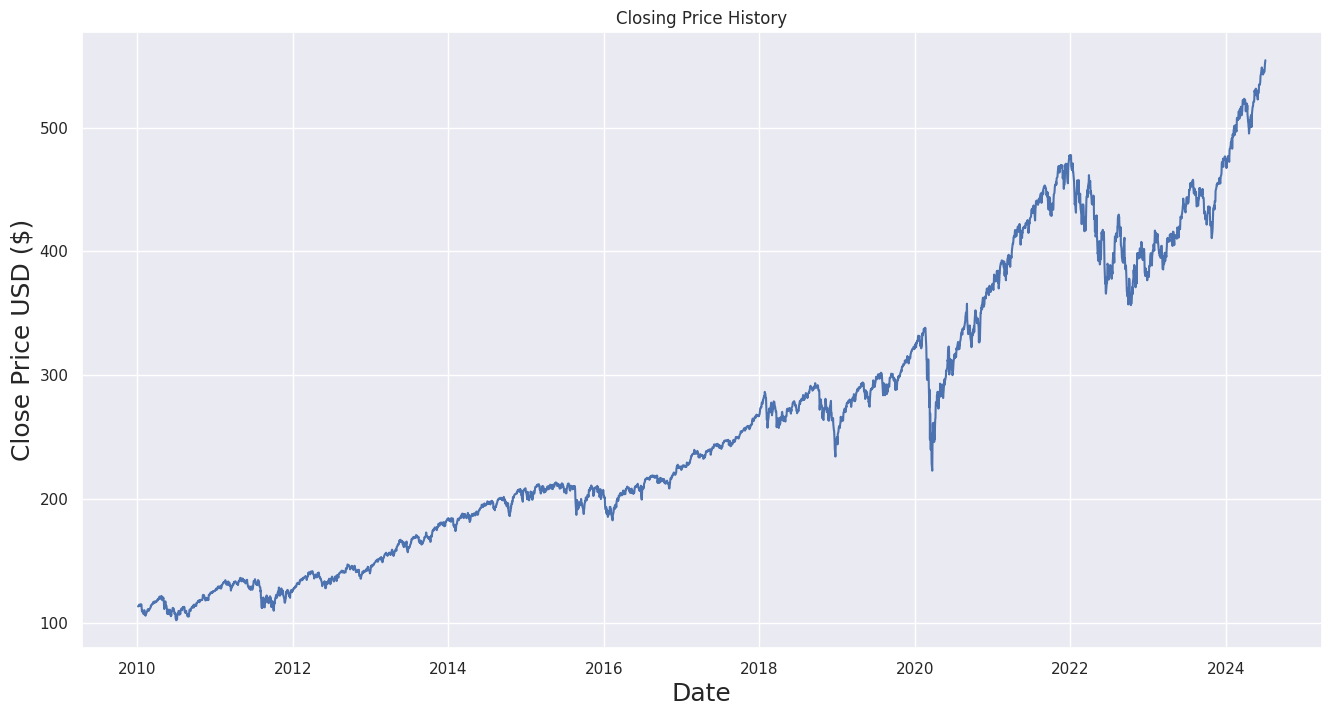

In [42]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data_spy['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD ($)",fontsize = 18)
plt.show()

In [43]:
data = data_spy.filter(['Close'])
#Convert the data frame to numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8) # Training about 80% of the data
training_data_len

2920

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02461846],
       [0.02528202],
       [0.02545897],
       ...,
       [0.9882991 ],
       [0.99371828],
       [1.        ]])

In [45]:
#Create the training data set, create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # will contain 60 values
    y_train.append(train_data[i,0]) # will contain 61st value
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02461846, 0.02528202, 0.02545897, 0.02652069, 0.02736121,
       0.02771512, 0.02534839, 0.02747181, 0.0281575 , 0.02530414,
       0.02844504, 0.02585712, 0.02101305, 0.01550542, 0.01674408,
       0.01572661, 0.01687681, 0.01408981, 0.01147977, 0.01517364,
       0.01809334, 0.01687681, 0.00937847, 0.00986509, 0.00816192,
       0.01110375, 0.01063925, 0.01311657, 0.01291751, 0.01667773,
       0.01782793, 0.01926566, 0.01977439, 0.01981864, 0.01683256,
       0.01906658, 0.0187348 , 0.01888963, 0.02143332, 0.022119  ,
       0.0223402 , 0.02309224, 0.0266534 , 0.02669763, 0.0271179 ,
       0.02824597, 0.02930768, 0.0293298 , 0.02939615, 0.03143111,
       0.03295731, 0.03282461, 0.03045787, 0.03182924, 0.03364301,
       0.03238222, 0.03196197, 0.03180713, 0.03344394, 0.03362089])]
[0.03273612774046894]

[array([0.02461846, 0.02528202, 0.02545897, 0.02652069, 0.02736121,
       0.02771512, 0.02534839, 0.02747181, 0.0281575 , 0.02530414,
       0.02844504, 0.02585712, 0.02

In [46]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [47]:
#Reshape the data, LSTM expects the data to be 3dimensional: number of samples, number of time steps, number of features
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2860, 60, 1)

In [48]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
#Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [50]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2860/2860 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - loss: 0.0019


In [51]:
#Create the testing data set
#Create a new array containing new scaled values from index end of training set to full testing data set
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [52]:
#Convert the data into scaled values, numpy arrays
x_test = np.array(x_test)

In [53]:
#Reshape it to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [54]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [55]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

15.056180492378292

/tmp/ipykernel_36935/3906371567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


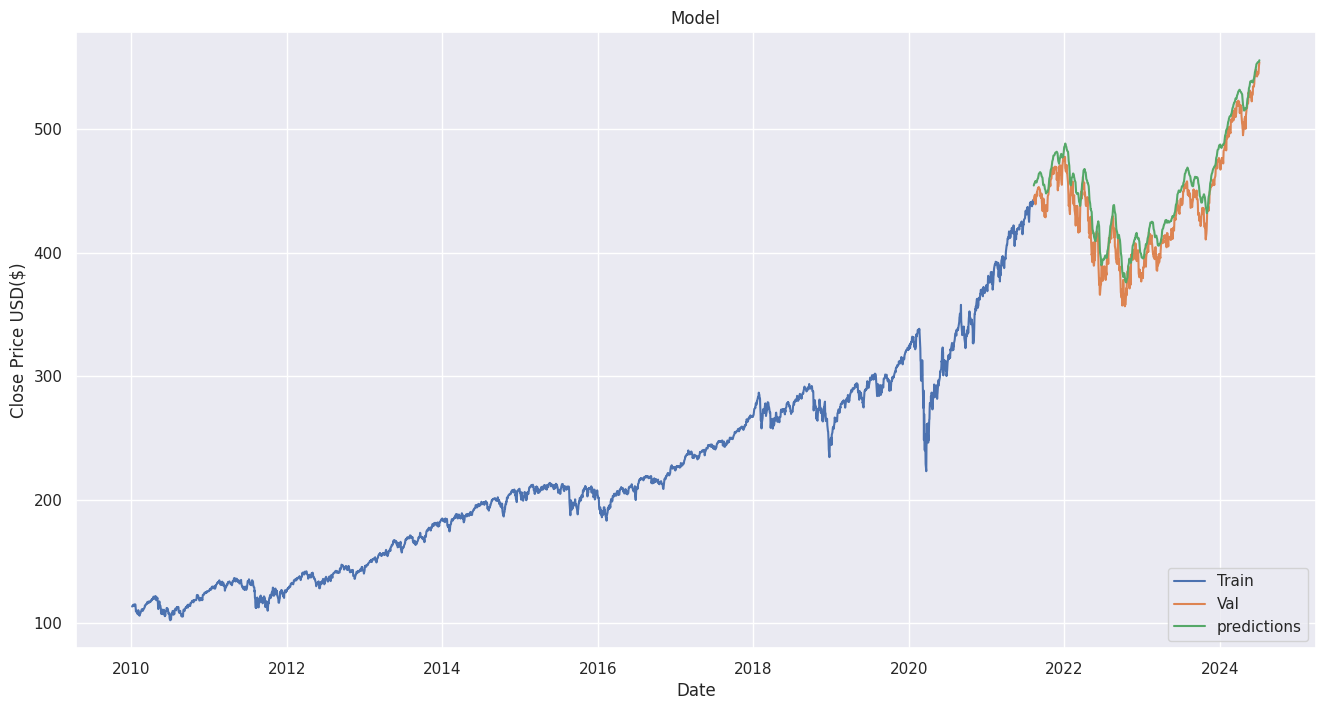

In [56]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower right')
plt.show()

In [57]:
valid['Open'] = data_spy['Open']
valid['Position'] = 0
valid['PnL'] = 0
new_order = ['Open','Close','predictions','Position','PnL']
valid = valid[new_order]
valid

/tmp/ipykernel_36935/455171364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Open'] = data_spy['Open']
/tmp/ipykernel_36935/455171364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Position'] = 0
/tmp/ipykernel_36935/455171364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Open       Close  predictions  Position  PnL
Date                                                          
2021-08-10  442.609985  442.679993   454.441986         0    0
2021-08-11  443.820007  443.779999   454.936554         0    0
2021-08-12  443.619995  445.109985   455.496429         0    0
2021-08-13  445.589996  445.920013   456.174469         0    0
2021-08-16  444.529999  446.970001   456.918701         0    0
2021-08-17  444.239990  444.040009   457.729645         0    0
2021-08-18  442.959991  439.179993   458.121521         0    0
2021-08-19  436.269989  439.859985   457.711823         0    0
2021-08-20  440.230011  443.359985   457.085602         0    0
2021-08-23  445.160004  447.260010   456.839111         0    0
2021-08-24  447.970001  447.970001   457.241852         0    0
2021-08-25  448.170013  448.910004   457.965271         0    0
2021-08-26  448.609985  446.260010   458.868439         0    0
2021-08-27  447.119995  450.250000   459.430450         0    0
2021-08-30  450.970001  452.230011   460.264160         0    0
2021-08-31  452.130005  451.559998   461.335083         0    0
2021-09-01  452.559998  451.799988   462.301788         0    0
2021-09-02  453.320007  453.190002   463.143127         0    0
2021-09-03  451.980011  453.079987   463.992188         0    0
2021-09-07  452.709991  451.459991   464.723206         0    0
2021-09-08  450.890015  450.910004   465.122406         0    0
2021-09-09  450.700012  448.980011   465.265839         0    0
2021-09-10  451.040009  445.440002   465.044739         0    0
2021-09-13  448.640015  446.579987   464.268616         0    0
2021-09-14  448.119995  444.170013   463.482147         0    0
2021-09-15  444.619995  447.880005   462.482758         0    0
2021-09-16  447.320007  447.170013   461.961273         0    0
2021-09-17  444.920013  441.399994   461.612640         0    0
2021-09-20  434.880005  434.040009   460.705261         0    0
2021-09-21  436.529999  433.630005   458.802246         0    0
...                ...         ...          ...       ...  ...
2024-05-22  530.650024  529.830017   537.671875         0    0
2024-05-23  532.960022  525.960022   538.591919         0    0
2024-05-24  527.849976  529.440002   538.774353         0    0
2024-05-28  530.270020  529.809998   539.039795         0    0
2024-05-29  525.679993  526.099976   539.320312         0    0
2024-05-30  524.520020  522.609985   539.138306         0    0
2024-05-31  523.590027  527.369995   538.389404         0    0
2024-06-03  529.020020  527.799988   538.058594         0    0
2024-06-04  526.460022  528.390015   537.964539         0    0
2024-06-05  530.770020  534.669983   538.062744         0    0
2024-06-06  534.979980  534.659973   538.976440         0    0
2024-06-07  533.659973  534.010010   540.101685         0    0
2024-06-10  533.179993  535.659973   541.122314         0    0
2024-06-11  534.070007  536.950012   542.175110         0    0
2024-06-12  541.630005  541.359985   543.253540         0    0
2024-06-13  543.150024  542.450012   544.723572         0    0
2024-06-14  540.880005  542.780029   546.287048         0    0
2024-06-17  542.080017  547.099976   547.740417         0    0
2024-06-18  547.159973  548.489990   549.475891         0    0
2024-06-20  549.440002  547.000000   551.256897         0    0
2024-06-21  544.400024  544.510010   552.662292         0    0
2024-06-24  544.330017  542.739990   553.450867         0    0
2024-06-25  543.989990  544.830017   553.675964         0    0
2024-06-26  543.690002  545.510010   553.874084         0    0
2024-06-27  545.369995  546.369995   554.093628         0    0
2024-06-28  547.159973  544.219971   554.394287         0    0
2024-07-01  545.630005  545.340027   554.438171         0    0
2024-07-02  543.700012  549.010010   554.513733         0    0
2024-07-03  548.690002  551.460022   555.013977         0    0
2024-07-05  551.770020  554.299988   555.904419         0    0

[730 rows x 5 columns]

In [58]:
count = 0
for i in range(1,len(valid)):
    if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]>0.2:
        if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]>1:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = 2
            valid['PnL'].iloc[i] = 2*(exit_price-entry_price)
            count+=1
        else:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = 1
            valid['PnL'].iloc[i] = exit_price-entry_price
            count+=1
    elif valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]<-0.2:
        if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]<-1:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = -2
            valid['PnL'].iloc[i] = 2*(-exit_price+entry_price)
            count+=1
        else:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = -1
            valid['PnL'].iloc[i] = -exit_price+entry_price
            count+=1
    else:
        valid['Position'].iloc[i] = 0
        valid['PnL'].iloc[i] = 0
        continue
valid['Cumulative_PnL'] = valid['PnL'].cumsum()
valid


/tmp/ipykernel_36935/475417675.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  valid['Position'].iloc[i] = 1
/tmp/ipykernel_36935/475417675.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setti

Open       Close  predictions  Position        PnL  \
Date                                                                   
2021-08-10  442.609985  442.679993   454.441986         0   0.000000   
2021-08-11  443.820007  443.779999   454.936554         1  -0.040009   
2021-08-12  443.619995  445.109985   455.496429         1   1.489990   
2021-08-13  445.589996  445.920013   456.174469         1   0.330017   
2021-08-16  444.529999  446.970001   456.918701         1   2.440002   
2021-08-17  444.239990  444.040009   457.729645         1  -0.199982   
2021-08-18  442.959991  439.179993   458.121521         1  -3.779999   
2021-08-19  436.269989  439.859985   457.711823        -1  -3.589996   
2021-08-20  440.230011  443.359985   457.085602        -1  -3.129974   
2021-08-23  445.160004  447.260010   456.839111        -1  -2.100006   
2021-08-24  447.970001  447.970001   457.241852         1   0.000000   
2021-08-25  448.170013  448.910004   457.965271         1   0.739990   
2021-08-26  448.609985  446.260010   458.868439         1  -2.349976   
2021-08-27  447.119995  450.250000   459.430450         1   3.130005   
2021-08-30  450.970001  452.230011   460.264160         1   1.260010   
2021-08-31  452.130005  451.559998   461.335083         2  -1.140015   
2021-09-01  452.559998  451.799988   462.301788         1  -0.760010   
2021-09-02  453.320007  453.190002   463.143127         1  -0.130005   
2021-09-03  451.980011  453.079987   463.992188         1   1.099976   
2021-09-07  452.709991  451.459991   464.723206         1  -1.250000   
2021-09-08  450.890015  450.910004   465.122406         1   0.019989   
2021-09-09  450.700012  448.980011   465.265839         0   0.000000   
2021-09-10  451.040009  445.440002   465.044739        -1   5.600006   
2021-09-13  448.640015  446.579987   464.268616        -1   2.060028   
2021-09-14  448.119995  444.170013   463.482147        -1   3.949982   
2021-09-15  444.619995  447.880005   462.482758        -1  -3.260010   
2021-09-16  447.320007  447.170013   461.961273        -1   0.149994   
2021-09-17  444.920013  441.399994   461.612640        -1   3.520020   
2021-09-20  434.880005  434.040009   460.705261        -1   0.839996   
2021-09-21  436.529999  433.630005   458.802246        -2   5.799988   
...                ...         ...          ...       ...        ...   
2024-05-22  530.650024  529.830017   537.671875         2  -1.640015   
2024-05-23  532.960022  525.960022   538.591919         1  -7.000000   
2024-05-24  527.849976  529.440002   538.774353         0   0.000000   
2024-05-28  530.270020  529.809998   539.039795         1  -0.460022   
2024-05-29  525.679993  526.099976   539.320312         1   0.419983   
2024-05-30  524.520020  522.609985   539.138306         0   0.000000   
2024-05-31  523.590027  527.369995   538.389404        -1  -3.779968   
2024-06-03  529.020020  527.799988   538.058594        -1   1.220032   
2024-06-04  526.460022  528.390015   537.964539         0   0.000000   
2024-06-05  530.770020  534.669983   538.062744         0   0.000000   
2024-06-06  534.979980  534.659973   538.976440         1  -0.320007   
2024-06-07  533.659973  534.010010   540.101685         2   0.700073   
2024-06-10  533.179993  535.659973   541.122314         2   4.959961   
2024-06-11  534.070007  536.950012   542.175110         2   5.760010   
2024-06-12  541.630005  541.359985   543.253540         2  -0.540039   
2024-06-13  543.150024  542.450012   544.723572         2  -1.400024   
2024-06-14  540.880005  542.780029   546.287048         2   3.800049   
2024-06-17  542.080017  547.099976   547.740417         2  10.039917   
2024-06-18  547.159973  548.489990   549.475891         2   2.660034   
2024-06-20  549.440002  547.000000   551.256897         2  -4.880005   
2024-06-21  544.400024  544.510010   552.662292         2   0.219971   
2024-06-24  544.330017  542.739990   553.450867         1  -1.590027   
2024-06-25  543.989990  544.830017   553.675964         1 

In [60]:
# Example: 10-year US Treasury yield (annualized)
risk_free_rate = 0.01 / 252  # assuming daily returns
average_return = valid['Cumulative_PnL'][-1]/len(SPY)
excess_return = average_return - risk_free_rate
std_dev_return = (valid['Cumulative_PnL']/len(SPY)).std()

sharpe_ratio = excess_return / std_dev_return
sharpe_ratio

/tmp/ipykernel_36935/3192387519.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_return = valid['Cumulative_PnL'][-1]/len(SPY)


2.3085206337293447